In [1]:
import pandas as pd

In [8]:
from datetime import datetime, timedelta

In [6]:
df1 = pd.read_csv("simulate_weather/csv_1981-2020/-3.05--79.31.nasapower.csv")
df2 = pd.read_csv("simulate_weather/simulated/-3.05--79.31-predictions_26.csv")
df3 = pd.read_csv("simulate_weather/simulated/-3.05--79.31-predictions_85.csv")

In [9]:
def year_day_to_date(year, day):
    return datetime(int(year), 1, 1) + timedelta(int(day) - 1)

# Apply the function to each row in the DataFrame
df1['date'] = df1.apply(lambda row: year_day_to_date(row['year'], row['day']), axis=1)

In [10]:
df2['date'] = df2.apply(lambda row: year_day_to_date(row['year'], row['day']), axis=1)

In [11]:
df3['date'] = df3.apply(lambda row: year_day_to_date(row['year'], row['day']), axis=1)

In [47]:
df1.drop(df1[df1.day!=366])

KeyError: "['lon', 'lat', 'year', 'day', 'radn', 'maxt', 'mint', 'rain', 'date'] not found in axis"

In [48]:
df2[df2.day==366]

year  day       radn       maxt       mint       rain       date   
365    2011  366  17.902829  17.982825  14.094076  12.837848 2012-01-01  \
731    2012  366  17.789971  22.061614  14.365825   1.023071 2012-12-31   
1097   2013  366  14.023430  22.673049  21.009123   0.000000 2014-01-01   
1463   2014  366  12.544751  22.644688  13.747765   5.317782 2015-01-01   
1829   2015  366   9.557272  20.489251  13.859040  10.844721 2016-01-01   
...     ...  ...        ...        ...        ...        ...        ...   
31109  2095  366  12.835252  24.370564  12.649935   6.944649 2096-01-01   
31475  2096  366  18.200918  23.632208  12.189663   2.507939 2096-12-31   
31841  2097  366   9.272288  21.387028  13.326736  13.018518 2098-01-01   
32207  2098  366  14.428165  21.185956  12.549298   6.778322 2099-01-01   
32573  2099  366   4.682655  21.143371  11.370566  21.595992 2100-01-01   

       value_grp  
365          366  
731          732  
1097        1098  
1463        1464  
1829        1830  
...          ...  
31109      31110  
31475      31476  
31841      31842  
32207      32208  
32573      32574  

[89 rows x 8 columns]

In [39]:
df2['value_grp'] = (df2.day.diff(1) != 0).astype('int').cumsum()

In [50]:
import calendar

In [64]:
df1[df1.day==366]

lon   lat  year  day   radn   maxt   mint   rain       date
1460  -79.31 -3.05  1984  366  15.53  20.64  13.09   0.99 1984-12-31
2921  -79.31 -3.05  1988  366  17.61  20.00  11.19   4.32 1988-12-31
4382  -79.31 -3.05  1992  366  19.19  22.26  12.62   1.51 1992-12-31
5843  -79.31 -3.05  1996  366  13.59  21.43  11.36   1.39 1996-12-31
7304  -79.31 -3.05  2000  366  15.22  24.33  13.73   0.13 2000-12-31
8765  -79.31 -3.05  2004  366  15.82  24.01  11.48   0.00 2004-12-31
10226 -79.31 -3.05  2008  366  11.56  23.11  13.15   0.00 2008-12-31
11687 -79.31 -3.05  2012  366  12.64  21.65  13.15   2.59 2012-12-31
13148 -79.31 -3.05  2016  366  14.28  22.94  12.58   0.70 2016-12-31
14609 -79.31 -3.05  2020  366  13.81  19.54  12.92  10.59 2020-12-31

In [65]:
df4 = pd.read_csv("-3.05--79.31.nasapower.csv")

In [66]:
df4[df4.day==366]

lon   lat  year  day   radn   maxt   mint   rain
1460  -79.31 -3.05  1984  366  15.53  20.64  13.09   0.99
2921  -79.31 -3.05  1988  366  17.61  20.00  11.19   4.32
4382  -79.31 -3.05  1992  366  19.19  22.26  12.62   1.51
5843  -79.31 -3.05  1996  366  13.59  21.43  11.36   1.39
7304  -79.31 -3.05  2000  366  15.22  24.33  13.73   0.13
8765  -79.31 -3.05  2004  366  15.82  24.01  11.48   0.00
10226 -79.31 -3.05  2008  366  11.56  23.11  13.15   0.00
11687 -79.31 -3.05  2012  366  12.64  21.65  13.15   2.59
13148 -79.31 -3.05  2016  366  14.28  22.94  12.58   0.70
14609 -79.31 -3.05  2020  366  13.81  19.54  12.92  10.59

In [51]:
df2['leap'] = df2['year'].apply(calendar.isleap)

In [63]:
df2.drop(df2[(df2.day==366) & (~df2.leap)].index)

year  day       radn       maxt       mint       rain       date   
0      2011    1  -0.086510  25.812014  10.926518   0.000000 2011-01-01  \
1      2011    2  16.476970  25.308992  13.547881   0.000000 2011-01-02   
2      2011    3   8.163342  20.455217  13.409249  17.963701 2011-01-03   
3      2011    4  22.209876  22.785359  13.320713   9.440206 2011-01-04   
4      2011    5  19.952483  27.058270  13.592930   7.768347 2011-01-05   
...     ...  ...        ...        ...        ...        ...        ...   
32568  2099  361   6.809088  25.120568  15.171261   6.634937 2099-12-27   
32569  2099  362  11.889695  23.522844  12.079356   0.000000 2099-12-28   
32570  2099  363  14.015725  13.243744  12.396591  10.068486 2099-12-29   
32571  2099  364  10.744162  21.713702  14.368205   5.295153 2099-12-30   
32572  2099  365   7.607761  19.011985  11.835406   0.000000 2099-12-31   

       value_grp   leap  
0              1  False  
1              2  False  
2              3  False  
3              4  False  
4              5  False  
...          ...    ...  
32568      32569  False  
32569      32570  False  
32570      32571  False  
32571      32572  False  
32572      32573  False  

[32507 rows x 9 columns]

In [42]:
df2[df2.year==2011].day

0        1
1        2
2        3
3        4
4        5
      ... 
361    362
362    363
363    364
364    365
365    366
Name: day, Length: 366, dtype: int64

In [45]:
df3.iloc[365:367]

year  day       radn       maxt       mint      rain       date
365  2011  366  13.600404  20.659180   9.518971  7.298811 2012-01-01
366  2012    1  13.847507  21.548518  14.548664  2.076983 2012-01-01

In [24]:
from plotly import graph_objs as go
import numpy as np

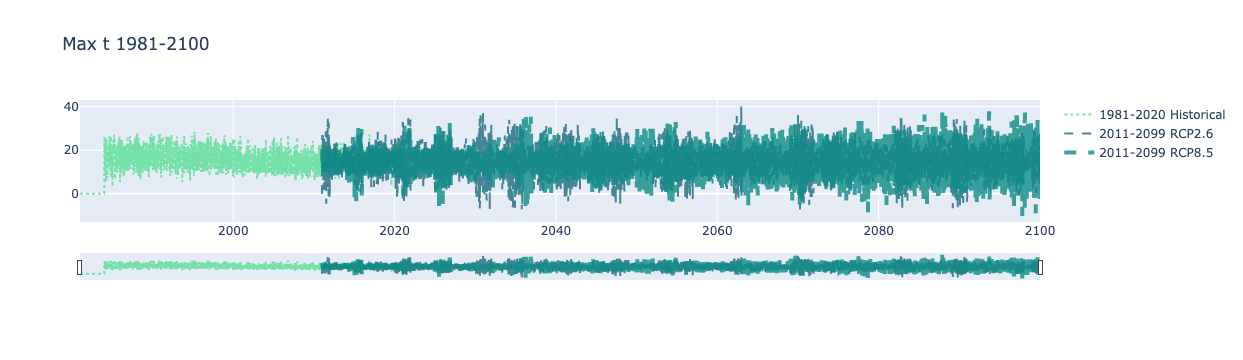

In [36]:
fig = go.Figure()
var="radn"
def my_color():
    return ('rgba('+str(np.random.randint(0, high = 256))+','+
                str(np.random.randint(0, high = 256))+','+
                str(np.random.randint(0, high = 256)))
fig.add_trace(go.Scatter(x=df1.date, y=df1[var], name="1981-2020 Historical",mode="lines", 
            # marker={ 
            #         'symbol': 'x', 
            #         'size': 15, 
            #         'color':my_color+',1)' # "rgba( 143, 82, 244,1)"
            #         },
            line={
                "color":my_color()+',0.8)',
                "dash":'dot'
            }))
fig.add_trace(go.Scatter(x=df2.date, y=df2[var], name="2011-2099 RCP2.6",line={
                "color":my_color()+',0.8)',
                "dash":'dash',
                "width":2
            }))
fig.add_trace(go.Scatter(x=df3.date, y=df3[var], name="2011-2099 RCP8.5",line={
                "color":my_color()+',0.8)',
                "dash":'dash',
                "width":4
            }))
# fig.add_trace(go.Scatter(x=df.Date, y=df['Close'], name="stock_close",line_color='dimgray'))
fig.layout.update(title_text='Max t 1981-2100',xaxis_rangeslider_visible=True)
fig